In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1.9 combine two data frames

In [68]:
df = pd.read_excel('gapminder_lifeexpectancy.xlsx')
df.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [69]:
df.columns

Index(['Life expectancy',              1800,              1801,
                    1802,              1803,              1804,
                    1805,              1806,              1807,
                    1808,
       ...
                    2007,              2008,              2009,
                    2010,              2011,              2012,
                    2013,              2014,              2015,
                    2016],
      dtype='object', length=218)

In [71]:
df1 = df[['Life expectancy', 2000]]
df1

,Life expectancy,2000
0,Abkhazia,NaN
1,Afghanistan,50.1
2,Akrotiri and Dhekelia,NaN
3,Albania,74.7
4,Algeria,73.3
...,...,...
255,Yugoslavia,NaN
256,Zambia,44.8
257,Zimbabwe,47.9
258,Åland,80.0


In [72]:
df1 = df1.rename(columns={2000: 'Life expectancy', 'Life expectancy': 'country'})
df1

,country,Life expectancy
0,Abkhazia,NaN
1,Afghanistan,50.1
2,Akrotiri and Dhekelia,NaN
3,Albania,74.7
4,Algeria,73.3
...,...,...
255,Yugoslavia,NaN
256,Zambia,44.8
257,Zimbabwe,47.9
258,Åland,80.0


In [73]:
df2 = pd.read_csv('continents.csv', sep=';')
df2

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


## merge both DataFrames

In [121]:
df_merged_in = pd.merge(df1, df2, on='country')

In [80]:
df_merged_out = pd.merge(df1, df2, how='outer' ,on='country')

In [81]:
df_merged_out

,country,Life expectancy,continent
0,Abkhazia,NaN,NaN
1,Afghanistan,50.1,Asia
2,Akrotiri and Dhekelia,NaN,NaN
3,Albania,74.7,Europe
4,Algeria,73.3,Africa
...,...,...,...
273,Vatican City,NaN,Europe
274,Saint Kitts and Nevis,NaN,North America
275,Saint Lucia,NaN,North America
276,Saint Vincent and the Grenadines,NaN,North America


## remove all rows with empty values

In [131]:
df_merged_out.dropna(thresh=2, axis=0)

,country,Life expectancy,continent
1,Afghanistan,50.1,Asia
3,Albania,74.7,Europe
4,Algeria,73.3,Africa
5,American Samoa,71.7,NaN
6,Andorra,83.7,Europe
...,...,...,...
273,Vatican City,NaN,Europe
274,Saint Kitts and Nevis,NaN,North America
275,Saint Lucia,NaN,North America
276,Saint Vincent and the Grenadines,NaN,North America


## print the highest and lowest life expectancy for each continent

In [148]:
df_merged_out['continent'].unique()

array([nan, 'Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Australia and Oceania'], dtype=object)

In [149]:
print('Asia.max: ', df_merged_out['Life expectancy'][df_merged_out['continent']=='Asia'].describe()['max'])
print('Asia.min: ', df_merged_out['Life expectancy'][df_merged_out['continent']=='Asia'].describe()['min'])

Asia.max:  81.0
Asia.min:  50.1


In [150]:
print('Africa.max: ', df_merged_out['Life expectancy'][df_merged_out['continent']=='Africa'].describe()['max'])
print('Africa.min: ', df_merged_out['Life expectancy'][df_merged_out['continent']=='Africa'].describe()['min'])

Africa.max:  75.0
Africa.min:  37.6


In [151]:
print('Europe.max: ', df_merged_out['Life expectancy'][df_merged_out['continent']=='Europe'].describe()['max'])
print('Europe.min: ', df_merged_out['Life expectancy'][df_merged_out['continent']=='Europe'].describe()['min'])

Europe.max:  83.7
Europe.min:  66.5


In [155]:
print('North America.max: ', df_merged_out['Life expectancy'][df_merged_out['continent']=='North America'].describe()['max'])
print('North America.min: ', df_merged_out['Life expectancy'][df_merged_out['continent']=='North America'].describe()['min'])

North America.max:  79.2
North America.min:  58.7


In [153]:
print('Australia and Oceania.max: ', df_merged_out['Life expectancy'][df_merged_out['continent']=='Australia and Oceania'].describe()['max'])
print('Australia and Oceania.min: ', df_merged_out['Life expectancy'][df_merged_out['continent']=='Australia and Oceania'].describe()['min'])

Australia and Oceania.max:  79.8
Australia and Oceania.min:  57.5


In [154]:
print('South America.max: ', df_merged_out['Life expectancy'][df_merged_out['continent']=='South America'].describe()['max'])
print('South America.min: ', df_merged_out['Life expectancy'][df_merged_out['continent']=='South America'].describe()['min'])

South America.max:  77.3
South America.min:  64.2


## Plot the numbers

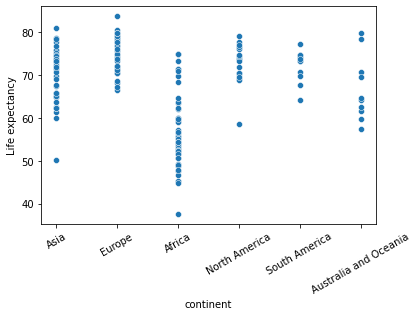

In [182]:
ax = sns.scatterplot(x='continent', y='Life expectancy', data=df_merged_out)
plt.xticks(rotation=30)
plt.show()

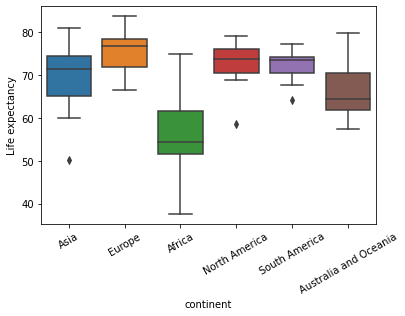

In [184]:
ax = sns.boxplot(x="continent", y="Life expectancy", data=df_merged_out)
plt.xticks(rotation=30)
plt.show()

## fix 10 bugs

## # 1. Read a data file

In [190]:
# "pd" was missing
df = pd.read_csv('gapminder_total_fertility.csv', index_col=0)

## 2. Inspect the size of a DataFrame

In [193]:
# () aft the end has to be removed
df.shape

(260, 216)

## 3. Convert column labels to integers

In [195]:
# axis= 0 has to be changed to axis=1 because it is is a column not a row
df.set_axis(df.columns.astype(int), axis=1, inplace=True)

## 4. Remove rows with missing values

In [198]:
# inplace=True has to be added to save the changes
df.dropna(inplace=True)
df

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total fertility rate,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71
Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,6.94,...,6.60,6.52,6.43,6.33,6.22,6.10,5.98,5.86,5.75,5.65
Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,4.97,...,2.20,2.18,2.16,2.15,2.13,2.12,2.10,2.09,2.08,2.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,4.70,4.70,4.70,4.70,4.70,4.70,4.70,4.70,4.70,4.70,...,1.89,1.88,1.86,1.84,1.82,1.79,1.77,1.74,1.72,1.70
Virgin Islands (U.S.),5.55,5.55,5.55,5.55,5.55,5.55,5.55,5.55,5.55,5.55,...,2.34,2.39,2.44,2.47,2.49,2.50,2.50,2.49,2.47,2.45
Yemen,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,...,5.20,5.01,4.83,4.66,4.50,4.35,4.21,4.08,3.95,3.83


## 5. Inspect a single value

In [201]:
df.loc['Germany'][2000]

1.35

## 6. Calculate the mean of a column

In [202]:
df[2000].mean()

3.2499497487437217

## 7. Filter rows with values in given range

In [207]:
# . was missing before 'between'
df[df[2000].between(6.0, 6.5)][2000]

Total fertility rate
Malawi     6.25
Nigeria    6.10
Yemen      6.36
Zambia     6.07
Name: 2000, dtype: float64

## 8. Mean fertility over time

<AxesSubplot:>

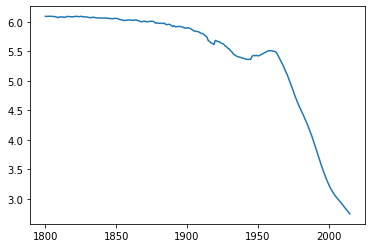

In [208]:
# the position of  mean and plot has to be reveresed
df.mean().plot()

## 9. Three countries over time

<AxesSubplot:>

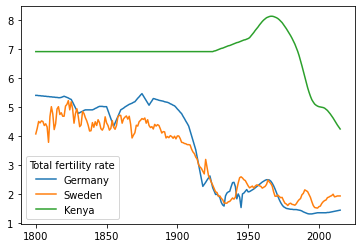

In [226]:
df.loc[['Germany','Sweden', 'Kenya']].transpose().plot()

## 10. Countries with most frequent initials

<bound method Axes.bar of <AxesSubplot:>>

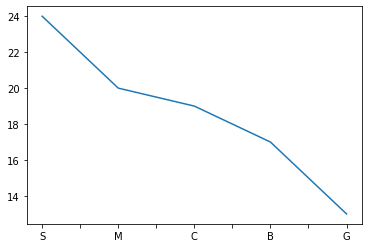

In [229]:
df.reset_index()['Total fertility rate'].str[0].value_counts().head().plot().bar